In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import pickle
from random import random

In [2]:
opt=Adam(learning_rate=0.01)
ds = tf.keras.datasets.fashion_mnist
(dxtrain,dytrain),(dxtest,dytest)=ds.load_data()
dxtrain=tf.keras.utils.normalize(dxtrain,axis=1)
dxtest=tf.keras.utils.normalize(dxtest,axis=1)
labeldes={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [3]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(units=128,activation="relu"))
model2.add(tf.keras.layers.Dense(units=128,activation="relu"))
model2.add(tf.keras.layers.Dense(units=64,activation="sigmoid"))
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(units=128,activation="relu"))
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model2.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(dxtrain,dytrain,epochs=10,validation_data=(dxtest,dytest))

model2.save("fmnist.model")

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5774 - accuracy: 0.7882 - val_loss: 0.4509 - val_accuracy: 0.8349
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3908 - accuracy: 0.8584 - val_loss: 0.3780 - val_accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8741 - val_loss: 0.3751 - val_accuracy: 0.8618
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8830 - val_loss: 0.3567 - val_accuracy: 0.8677
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.8877 - val_loss: 0.3529 - val_accuracy: 0.8676
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.8949 - val_loss: 0.3318 - val_accuracy: 0.8774
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - accuracy: 0.8997 - val_loss: 0.3410 - val_accuracy:

In [8]:
import pickle
pickle.dump(model2,open("./fmnist-classifier.pkl","wb"))

INFO:tensorflow:Assets written to: ram://c3029a9c-c66c-4e6c-9127-1a5f432c8b90/assets


In [4]:
labeldes={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

1/1 [==============================] - 0s 103ms/step
index number 5335
real Bag
pre Bag


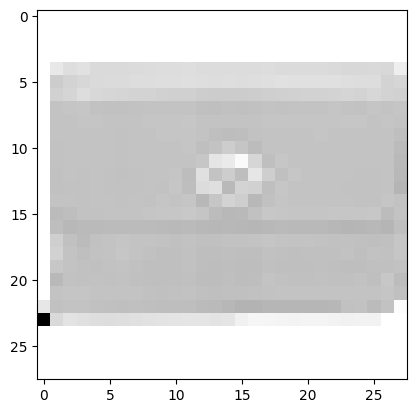

In [7]:
i=int(random()*10000)
result=model2.predict(np.array([dxtest[i]]))
print("index number",i)
print("real",labeldes[dytest[i]])
print("pre",labeldes[np.argmax(result)])
plt.imshow(dxtest[i],cmap=plt.cm.binary)
plt.show()